In [0]:
# Importing the libraries
# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
# https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import files
uploaded = files.upload()

Saving hw2_question1.csv to hw2_question1 (3).csv


In [0]:
from __future__ import print_function
# Import the dataset
dataset = pd.read_csv('hw2_question1.csv', header=None)
full_dataset = dataset.iloc[:, :].values
import collections
class_column = full_dataset[:,9]
class_summary = collections.Counter(class_column)

benign = class_summary[2]
malignant = class_summary[4]

total_samples = len(dataset)

print('Total number of samples is {}'.format(total_samples))
print('Input shape is {}'.format(dataset.shape))
print('Number of samples belonging to the benign case is {}'.format(benign))
print('Number of samples belonging to the malignant case is {}'.format(malignant))


Total number of samples is 683
Input shape is (683, 10)
Number of samples belonging to the benign case is 444
Number of samples belonging to the malignant case is 239


In [0]:
dataset.head(10)


,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [0]:
benign_samples = dataset[dataset[9] == 2]
malignant_samples = dataset[dataset[9] == 4]

In [0]:
benign_samples.shape

(444, 10)

In [0]:
malignant_samples.shape

(239, 10)

In [0]:
benign_samples.head(5)

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [0]:
malignant_samples.head(5)

,0,1,2,3,4,5,6,7,8,9
5,8,10,10,8,7,10,9,7,1,4
12,5,3,3,3,2,3,4,4,1,4
14,8,7,5,10,7,9,5,5,4,4
15,7,4,6,4,6,1,4,3,1,4
18,10,7,7,6,4,10,4,1,2,4


In [0]:
total_train_samples = (int)((2/3)*total_samples)
total_test_samples = total_samples - total_train_samples

print('Total number of training samples is {}'.format(total_train_samples))
print('Total number of test samples is {}'.format(total_test_samples))

Total number of training samples is 455
Total number of test samples is 228


In [0]:
# Reference used:
# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# shuffle the samples
benign_samples = benign_samples.sample(frac=1, random_state=8765).reset_index(drop=True)
malignant_samples = malignant_samples.sample(frac=1, random_state=8734).reset_index(drop=True)

In [0]:
benign_samples.head(5)

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,2,1,3,1,1,2
1,4,1,1,1,2,1,3,1,1,2
2,3,2,1,1,2,2,3,1,1,2
3,6,3,3,3,3,2,6,1,1,2
4,3,1,1,3,2,1,2,1,1,2


In [0]:
malignant_samples.head(5)

,0,1,2,3,4,5,6,7,8,9
0,2,5,7,6,4,10,7,6,1,4
1,3,5,7,8,8,9,7,10,7,4
2,3,4,5,2,6,8,4,1,1,4
3,10,10,10,7,9,10,7,10,10,4
4,9,8,8,9,6,3,4,1,1,4


In [0]:
# get benign samples
train_benign_samples = (int)((2/3)*benign)
test_benign_samples = benign - train_benign_samples

train_benign = benign_samples.head(train_benign_samples)
test_benign = benign_samples.tail(test_benign_samples)

In [0]:
train_benign.shape

(296, 10)

In [0]:
test_benign.shape

(148, 10)

In [0]:
# get malignant samples
train_malignant_samples = (int)((2/3)*malignant)
test_malignant_samples = malignant - train_malignant_samples

train_malignant = malignant_samples.head(train_malignant_samples)
test_malignant = malignant_samples.tail(test_malignant_samples)

In [0]:
train_malignant.shape

(159, 10)

In [0]:
test_malignant.shape

(80, 10)

In [0]:
final_train_set = pd.concat([train_benign, train_malignant])
final_train_set = final_train_set.sample(frac=1).reset_index(drop=True)
print(final_train_set.shape)
print(final_train_set.head(5))

(455, 10)
    0   1   2  3  4   5  6  7  8  9
0   5  10  10  5  4   5  4  4  1  4
1   5   1   1  1  3   2  2  2  1  2
2  10   6   6  2  4  10  9  7  1  4
3   8   4   7  1  3  10  3  9  2  4
4   4   8   6  3  4  10  7  1  1  4


In [0]:
final_test_set = pd.concat([test_benign, test_malignant])
final_test_set = final_test_set.sample(frac=1).reset_index(drop=True)
print(final_test_set.shape)
print(final_test_set.head(5))

(228, 10)
   0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  1  1  3  1  1  2
1  1  1  1  1  2  1  2  1  1  2
2  2  1  1  1  2  1  1  1  1  2
3  5  1  3  1  2  1  1  1  1  2
4  2  1  1  1  2  1  3  1  1  2


In [0]:
# Decision Tree Code starts from here
# List of references used:
# https://acadgild.com/blog/decision-tree-python-code
# (Main) https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
# https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
# https://medium.com/@rakendd/decision-tree-from-scratch-9e23bcfb4928

def class_counts(X):
    """Counts the number samples belonging to each class for given set of samples"""
    class_column = X[9]
    class_summary = collections.Counter(class_column)
    return class_summary

In [0]:
print(class_counts(final_train_set))
print(class_counts(final_test_set))

Counter({2: 296, 4: 159})
Counter({2: 148, 4: 80})


In [0]:
class SplitAttribute:
    
    def __init__(self, column, value):
        self.column = column
        self.value = value
    """ go to left if true and right otherwise"""
    def compare(self, sample):
        val = sample[self.column]
        return val < self.value
    
    def __repr__(self):
        return "Is the value in column %s < %s?" % (
            str(self.column), str(self.value))

In [0]:
def GenerateSubsets(rows, split_attribute):
    
    if(len(rows) != 0 and split_attribute != None):
        column = split_attribute.column
        value = split_attribute.value
        left_rows = rows[rows[column] < value]
        right_rows = rows[rows[column] >= value]
        return left_rows, right_rows
    
    return pd.DataFrame(), pd.DataFrame()

In [0]:
import math

def info_content(rows):
    class_summary = class_counts(rows)
    class_benign = class_summary[2]
    class_malignant = class_summary[4]
    first_term = 0.0
    second_term = 0.0
    if(class_benign != 0):
        first_term = -1.0 * float(class_benign/float(class_benign+class_malignant)) * math.log(float(class_benign/ float(class_benign+class_malignant)), 2)
        
    if(class_malignant != 0):
        second_term = -1.0 * float(class_malignant/ float(class_benign+class_malignant)) * math.log(float(class_malignant/ float(class_benign+class_malignant)), 2)
    
    if(first_term == 0 and second_term==0):
        return 0
    
    return float(first_term + second_term)

def Entropy(left, right, all_data):
    info_content_left = info_content(left)
    info_content_right = info_content(right)
    entrofy_of_attribute = float(len(left)/float(len(all_data)))*info_content_left + float(len(right)/float(len(all_data)))*info_content_right 
    gain = info_content(all_data) - entrofy_of_attribute
    # using the information gain method which uses entropy
    return gain
  

In [0]:
# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def gini_index(left, right, all_data):
    current_uncertainty = gini(all_data)
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)


In [0]:
def find_split_attribute(rows, method='Entropy'):
    
    max_gain = 0.0  
    split_attribute_selected = None  
    shape = rows.shape
    n_samples = shape[0]
    # we have to try these splits for each feature and see which one is giving the best result
    split_values = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])
    # for each column
    column_list = list(rows)
    # remove the "class" column for the frature list
    column_list.remove(9)
    for col in column_list:  

        for split_value in split_values:  # for each split value

            split_attribute = SplitAttribute(col, split_value)

            # split the dataset arounf the split_value
            left_rows, right_rows = GenerateSubsets(rows, split_attribute)

            if len(left_rows) == 0 or len(right_rows) == 0:
                continue

            # Calculate the information gain from this split
            if(method=='Entropy'):
                gain = Entropy(left_rows, right_rows, rows)
            else:
                gain = gini_index(left_rows, right_rows, rows)

            if gain >= max_gain:
                max_gain, split_attribute_selected = gain, split_attribute

    return max_gain, split_attribute_selected

In [0]:
class Leaf:
    """A Leaf node classifies data.
    """
    def __init__(self, rows):
        self.predictions = class_counts(rows)
      

In [0]:
class Decision_Node:
    """A Decision Node.
    This holds a reference to the splitting atribute, and to the two child nodes.
    """

    def __init__(self,
                 split_attribute,
                 true_branch,
                 false_branch):
        self.split_attribute = split_attribute
        self.true_branch = true_branch
        self.false_branch = false_branch

In [0]:
def build_tree(rows, method='Entropy', depth=100, theta=0.0, debug=True):
    gain, split_attribute = find_split_attribute(rows, method)

    # Base case: no further gain or we reached max depth
    # Since we can ask no further questions,
    # we'll return a leaf.
    if debug == True:
        print('Gain is {}'.format(gain))
        print('split_attribute is {}'.format(split_attribute))
    
    if depth==0 or gain <= theta  :
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = GenerateSubsets(rows, split_attribute)
    
    if(split_attribute != None):
        true_rows.drop(columns=[split_attribute.column])
        false_rows.drop(columns=[split_attribute.column])
    
    # Recursively build the true branch.
    true_branch = build_tree(true_rows, method, depth-1, theta, debug)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows, method, depth-1, theta, debug)
    
    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    if debug == True:
        print("----------------------------------------------\n")
    
    return Decision_Node(split_attribute, true_branch, false_branch)

In [0]:
# NOT MY CODE: https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.split_attribute))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [0]:
my_tree = build_tree(final_train_set)


Gain is 0.6126468687112621
split_attribute is Is the value in column 2 < 2.5?
Gain is 0.039670439818737385
split_attribute is Is the value in column 0 < 5.5?
Gain is 0.0
split_attribute is Is the value in column 8 < 7.5?
Gain is 0.8112781244591328
split_attribute is Is the value in column 5 < 3.5?
Gain is 0.0
split_attribute is Is the value in column 6 < 6.5?
Gain is 0.0
split_attribute is Is the value in column 8 < 1.5?
----------------------------------------------

----------------------------------------------

Gain is 0.23873411139925965
split_attribute is Is the value in column 1 < 4.5?
Gain is 0.43758972214858805
split_attribute is Is the value in column 5 < 3.5?
Gain is 0.37704348578234015
split_attribute is Is the value in column 7 < 3.5?
Gain is 0.0
split_attribute is Is the value in column 7 < 2.5?
Gain is 0.9182958340544896
split_attribute is Is the value in column 4 < 6.5?
Gain is 0.0
split_attribute is Is the value in column 8 < 3.5?
Gain is 0.0
split_attribute is Is the 

In [0]:
print_tree(my_tree)
print(my_tree.split_attribute)

Is the value in column 2 < 2.5?
--> True:
  Is the value in column 0 < 5.5?
  --> True:
    Predict Counter({2: 256})
  --> False:
    Is the value in column 5 < 3.5?
    --> True:
      Predict Counter({2: 6})
    --> False:
      Predict Counter({4: 2})
--> False:
  Is the value in column 1 < 4.5?
  --> True:
    Is the value in column 5 < 3.5?
    --> True:
      Is the value in column 7 < 3.5?
      --> True:
        Predict Counter({2: 25})
      --> False:
        Is the value in column 4 < 6.5?
        --> True:
          Predict Counter({4: 4})
        --> False:
          Predict Counter({2: 2})
    --> False:
      Is the value in column 2 < 4.5?
      --> True:
        Is the value in column 4 < 2.5?
        --> True:
          Predict Counter({4: 7})
        --> False:
          Is the value in column 5 < 7.5?
          --> True:
            Is the value in column 6 < 6.5?
            --> True:
              Is the value in column 7 < 2.5?
              --> True:
          

In [0]:
def classify(row, node):
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        predictions = node.predictions
        mode = max(predictions, key=predictions.get)
        return mode

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    column = node.split_attribute.column
    value = node.split_attribute.value
    
    if row[column] < value:
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [0]:
targets, preds = [], []
for index, row in final_test_set.iterrows():
    prediction = classify(row, my_tree)
    targets.append(row[9])
    preds.append(prediction)
    
print(accuracy_score(targets, preds))

0.9342105263157895


In [0]:
final_test_set.shape

(228, 10)

In [0]:
targets, preds = [], []
for index, row in final_train_set.iterrows():
    prediction = classify(row, my_tree)
    targets.append(row[9])
    preds.append(prediction)

print(accuracy_score(targets, preds))

1.0


In [0]:
my_tree = build_tree(final_train_set, method='gini index', depth=100)

print_tree(my_tree)
print(my_tree.split_attribute)


Gain is 0.32845435662517314
split_attribute is Is the value in column 2 < 3.5?
Gain is 0.057637670649509525
split_attribute is Is the value in column 6 < 3.5?
Gain is 0.007040361467329795
split_attribute is Is the value in column 7 < 9.5?
Gain is 0.00711670229564456
split_attribute is Is the value in column 0 < 9.5?
Gain is 0.0023806731049104335
split_attribute is Is the value in column 7 < 3.5?
Gain is 0.0
split_attribute is Is the value in column 8 < 7.5?
Gain is 0.4444444444444444
split_attribute is Is the value in column 7 < 4.5?
Gain is 0.0
split_attribute is None
Gain is 0.0
split_attribute is Is the value in column 8 < 2.5?
----------------------------------------------

----------------------------------------------

Gain is 0.0
split_attribute is None
----------------------------------------------

Gain is 0.0
split_attribute is None
----------------------------------------------

Gain is 0.29805996472663143
split_attribute is Is the value in column 5 < 2.5?
Gain is 0.0
split_

In [0]:
targets, preds = [], []
for index, row in final_test_set.iterrows():
    prediction = classify(row, my_tree)
    targets.append(row[9])
    preds.append(prediction)

print(accuracy_score(targets, preds))    

0.9342105263157895


In [0]:
targets, preds = [], []
for index, row in final_train_set.iterrows():
    prediction = classify(row, my_tree)
    targets.append(row[9])
    preds.append(prediction)

print(accuracy_score(targets, preds))    

1.0


In [0]:
test_entropy = []
train_entropy = []

DEPTH = range(1,11)
method='Entropy'
    
print('Method used is {}'.format(method))
for depth in DEPTH:
    # build a tree
    my_tree = build_tree(final_train_set, method, depth)

    targets, preds = [], []
    for index, row in final_test_set.iterrows():
        prediction = classify(row, my_tree)
        targets.append(row[9])
        preds.append(prediction)
    test_accuracy = accuracy_score(targets, preds)
    test_entropy.append(test_accuracy*100)

    targets, preds = [], []
    for index, row in final_train_set.iterrows():
        prediction = classify(row, my_tree)
        targets.append(row[9])
        preds.append(prediction)
    train_accracy = accuracy_score(targets, preds)
    train_entropy.append(train_accracy*100)

    print('Depth is {} | Training Accuracy is {} | Test Accuracy is {} '.format(depth, train_accracy, test_accuracy))    
        

Method used is Entropy
Gain is 0.6126468687112621
split_attribute is Is the value in column 2 < 2.5?
Gain is 0.039670439818737385
split_attribute is Is the value in column 0 < 5.5?
Gain is 0.23873411139925965
split_attribute is Is the value in column 1 < 4.5?
----------------------------------------------

Depth is 1 | Training Accuracy is 0.9208791208791208 | Test Accuracy is 0.9035087719298246 
Gain is 0.6126468687112621
split_attribute is Is the value in column 2 < 2.5?
Gain is 0.039670439818737385
split_attribute is Is the value in column 0 < 5.5?
Gain is 0.0
split_attribute is Is the value in column 8 < 7.5?
Gain is 0.8112781244591328
split_attribute is Is the value in column 5 < 3.5?
----------------------------------------------

Gain is 0.23873411139925965
split_attribute is Is the value in column 1 < 4.5?
Gain is 0.43758972214858805
split_attribute is Is the value in column 5 < 3.5?
Gain is 0.030732353337199717
split_attribute is Is the value in column 6 < 4.5?
---------------

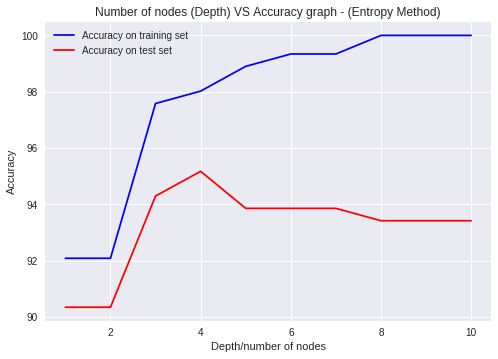

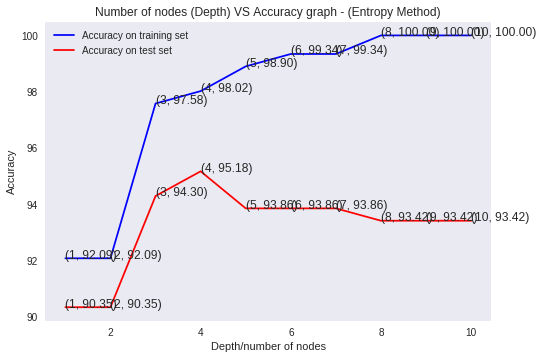

In [0]:
plt.plot(DEPTH, train_entropy, 'b', label='Accuracy on training set')
plt.plot(DEPTH, test_entropy, 'r', label='Accuracy on test set')
plt.title('Number of nodes (Depth) VS Accuracy graph - (Entropy Method)')
plt.xlabel('Depth/number of nodes')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

A = DEPTH
B = train_entropy

plt.plot(A, B, 'b', label='Accuracy on training set')
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %.2f)' % xy, xy=xy, textcoords='data') # <--

B = test_entropy
plt.plot(A, B, 'r', label='Accuracy on test set')
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %.2f)' % xy, xy=xy, textcoords='data') # <--

plt.title('Number of nodes (Depth) VS Accuracy graph - (Entropy Method)')
plt.xlabel('Depth/number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



In [0]:
test_gini = []
train_gini = []

DEPTH = range(1,11)

method = 'Gini Index'
    
print('Method used is {}'.format(method))
for depth in DEPTH:
    my_tree = build_tree(final_train_set, method, depth)
    if method != 'Entropy':
        targets, preds = [], []
        for index, row in final_test_set.iterrows():
            prediction = classify(row, my_tree)
            targets.append(row[9])
            preds.append(prediction)
        test_accuracy = accuracy_score(targets, preds)
        test_gini.append(test_accuracy*100)

        targets, preds = [], []
        for index, row in final_train_set.iterrows():
            prediction = classify(row, my_tree)
            targets.append(row[9])
            preds.append(prediction)
        train_accracy = accuracy_score(targets, preds)
        train_gini.append(train_accracy*100)

    print('Depth is {} | Training Accuracy is {} | Test Accuracy is {} '.format(depth, train_accracy, test_accuracy))    
        

Method used is Gini Index
Gain is 0.32845435662517314
split_attribute is Is the value in column 2 < 3.5?
Gain is 0.057637670649509525
split_attribute is Is the value in column 6 < 3.5?
Gain is 0.033344831006567204
split_attribute is Is the value in column 1 < 4.5?
----------------------------------------------

Depth is 1 | Training Accuracy is 0.9318681318681319 | Test Accuracy is 0.9122807017543859 
Gain is 0.32845435662517314
split_attribute is Is the value in column 2 < 3.5?
Gain is 0.057637670649509525
split_attribute is Is the value in column 6 < 3.5?
Gain is 0.007040361467329795
split_attribute is Is the value in column 7 < 9.5?
Gain is 0.29805996472663143
split_attribute is Is the value in column 5 < 2.5?
----------------------------------------------

Gain is 0.033344831006567204
split_attribute is Is the value in column 1 < 4.5?
Gain is 0.18946871409925609
split_attribute is Is the value in column 5 < 3.5?
Gain is 0.002026701657983916
split_attribute is Is the value in column

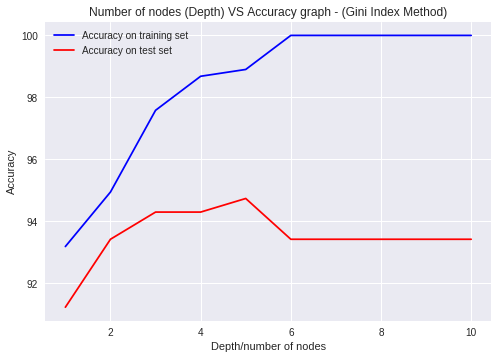

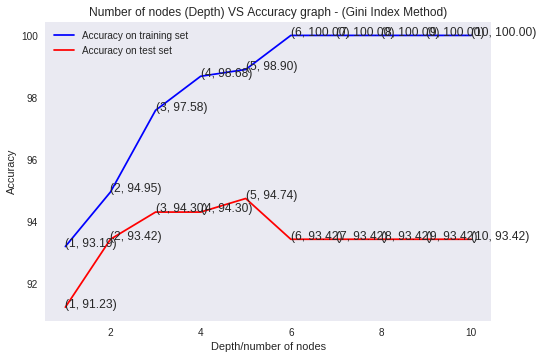

In [0]:
plt.plot(DEPTH, train_gini, 'b', label='Accuracy on training set')
plt.plot(DEPTH, test_gini, 'r', label='Accuracy on test set')
plt.title('Number of nodes (Depth) VS Accuracy graph - (Gini Index Method)')
plt.xlabel('Depth/number of nodes')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

A = DEPTH
B = train_gini

plt.plot(A, B, 'b', label='Accuracy on training set')
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %.2f)' % xy, xy=xy, textcoords='data') # <--

B = test_gini
plt.plot(A, B, 'r', label='Accuracy on test set')
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %.2f)' % xy, xy=xy, textcoords='data') # <--

plt.title('Number of nodes (Depth) VS Accuracy graph - (Gini Index Method)')
plt.xlabel('Depth/number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



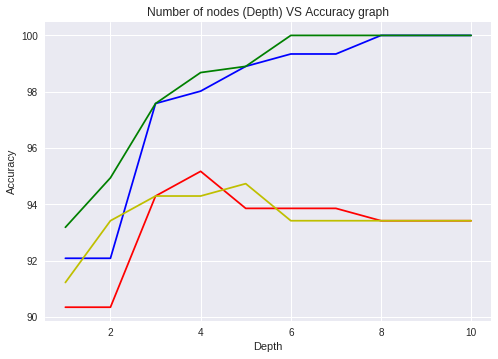

In [0]:
plt.plot(DEPTH, train_entropy, 'b', label='Accuracy on training set')
plt.plot(DEPTH, test_entropy, 'r', label='Accuracy on test set')
plt.plot(DEPTH, train_gini, 'g', label='Accuracy on training set')
plt.plot(DEPTH, test_gini, 'y', label='Accuracy on test set')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Number of nodes (Depth) VS Accuracy graph')
plt.show();

In [0]:
# Pre-pruning test
test_entropy = []
train_entropy = []

THETAS = [1e-4, 3e-4, 9e-4, 1e-3, 3e-3, 9e-3, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9, 1, 3 ]
method='Entropy'
    
print('Method used is {}'.format(method))
for theta in THETAS:
    # build a tree
    my_tree = build_tree(final_train_set, method, 100, theta, False)

    targets, preds = [], []
    for index, row in final_test_set.iterrows():
        prediction = classify(row, my_tree)
        targets.append(row[9])
        preds.append(prediction)
    test_accuracy = accuracy_score(targets, preds)
    test_entropy.append(test_accuracy*100)

    targets, preds = [], []
    for index, row in final_train_set.iterrows():
        prediction = classify(row, my_tree)
        targets.append(row[9])
        preds.append(prediction)
    train_accracy = accuracy_score(targets, preds)
    train_entropy.append(train_accracy*100)

    print('Threshold is {} | Training Accuracy is {} | Test Accuracy is {} '.format(theta, train_accracy, test_accuracy))    
        

Method used is Entropy
Threshold is 0.0001 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.0003 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.0009 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.001 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.003 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.009 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.01 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.03 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.09 | Training Accuracy is 0.9912087912087912 | Test Accuracy is 0.9342105263157895 
Threshold is 0.1 | Training Accuracy is 0.9912087912087912 | Test Accuracy is 0.9342105263157895 
Threshold is 0.3 | Training Accuracy is 0.9208791208791208 | Test Accuracy is 0.9035087719298246 
T

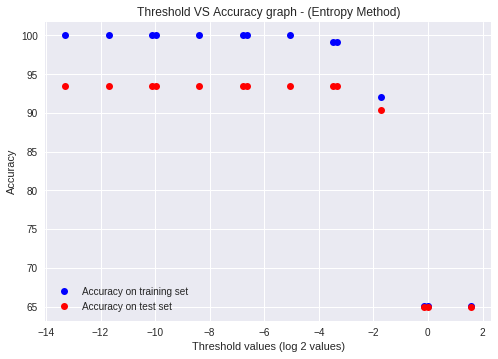

In [0]:
plt.plot(np.log2(THETAS), train_entropy, 'bo', label='Accuracy on training set')
plt.plot(np.log2(THETAS), test_entropy, 'ro', label='Accuracy on test set')
plt.title('Threshold VS Accuracy graph - (Entropy Method)')
plt.xlabel('Threshold values (log 2 values)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [0]:
test_gini = []
train_gini = []

THETAS = [1e-4, 3e-4, 9e-4, 1e-3, 3e-3, 9e-3, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9, 1, 3 ]
method = 'Gini Index'
    
print('Method used is {}'.format(method))
for theta in THETAS:
    # build a tree
    my_tree = build_tree(final_train_set, method, 100, theta, False)

    targets, preds = [], []
    for index, row in final_test_set.iterrows():
        prediction = classify(row, my_tree)
        targets.append(row[9])
        preds.append(prediction)
    test_accuracy = accuracy_score(targets, preds)
    test_gini.append(test_accuracy*100)

    targets, preds = [], []
    for index, row in final_train_set.iterrows():
        prediction = classify(row, my_tree)
        targets.append(row[9])
        preds.append(prediction)
    train_accracy = accuracy_score(targets, preds)
    train_gini.append(train_accracy*100)
    print('Threshold is {} | Training Accuracy is {} | Test Accuracy is {} '.format(theta, train_accracy, test_accuracy))   



Method used is Gini Index
Threshold is 0.0001 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.0003 | Training Accuracy is 1.0 | Test Accuracy is 0.9342105263157895 
Threshold is 0.0009 | Training Accuracy is 0.9978021978021978 | Test Accuracy is 0.9429824561403509 
Threshold is 0.001 | Training Accuracy is 0.9978021978021978 | Test Accuracy is 0.9429824561403509 
Threshold is 0.003 | Training Accuracy is 0.9934065934065934 | Test Accuracy is 0.9473684210526315 
Threshold is 0.009 | Training Accuracy is 0.989010989010989 | Test Accuracy is 0.9473684210526315 
Threshold is 0.01 | Training Accuracy is 0.989010989010989 | Test Accuracy is 0.9473684210526315 
Threshold is 0.03 | Training Accuracy is 0.989010989010989 | Test Accuracy is 0.9473684210526315 
Threshold is 0.09 | Training Accuracy is 0.9318681318681319 | Test Accuracy is 0.9122807017543859 
Threshold is 0.1 | Training Accuracy is 0.9318681318681319 | Test Accuracy is 0.9122807017543859 
Threshold

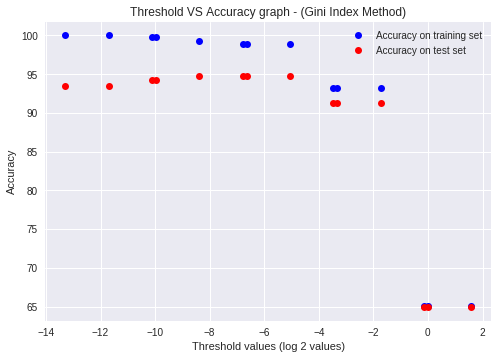

In [0]:
plt.plot(np.log2(THETAS), train_gini, 'bo', label='Accuracy on training set')
plt.plot(np.log2(THETAS), test_gini, 'ro', label='Accuracy on test set')
plt.title('Threshold VS Accuracy graph - (Gini Index Method)')
plt.xlabel('Threshold values (log 2 values)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()